# Chicken Farm


#### Hi welcome to the Chicken Farm lesson.
#### In this lesson you will use `Linear Regression` algorithm and your agent to build a chicken farm!


<img src="resources/ChickenFarm.png" width=1000px>


#### Background:

There is a village that needs to build a chicken farm. There are now 87 chickens in the village, but no one knows how big the farm should be. You are the builder of this chicken farm, and you need to use your robot to build a proper chicken farm for the village. The farm should not be too large (villagers do not want to waste money) or too small (because it will affect the growth of the chickens). Therefore, you need to find a proper size by your self. Here are some data from other chicken farms, please use this data to predict the size of this farm and help the villagers to build it.

##### Farm size: [20,40,60,80,100,120,140,40,50,60,105,48,54,63,72,103,108,93,90,68,36,90,88]

##### N of Chickens: [15,28,50,68,75,93,130,35,38,78,81,33,40,45,75,70,100,95,60,70,70,110,52]


#### If you never learn statistics or machine learning before, you might be wondering How ???
#### Let's see an example first

## Data Visualization

If you want to extract some useful information from a set of data, the most common way to do this is to make a graph. Graph makes the data more natural for us to understand and help us identify trends and patterns easily.

Now Let's learn How to use Python to print and analyze data.

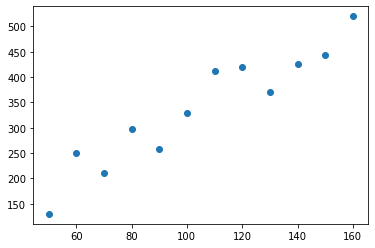

In [14]:
import matplotlib.pyplot as plt

#Let's assume that we have some price and size of houses in some city

size = [50,60,70,80,90,100,110,120,130,140,150,160] 
# size in square meter

price= [130,250,210,298,258,330,412,420,370,425,443,520] 
# price in hundred thousands

# We can use a python library called matplotlib to visualize our data 
plt.plot(size,price, "o")

plt.show()

# when we print our data, we can easily find that our data shows a linear trend
# We learned in math that the equation of a straight line is y= mx+b, so let's find a line that can fit our data.

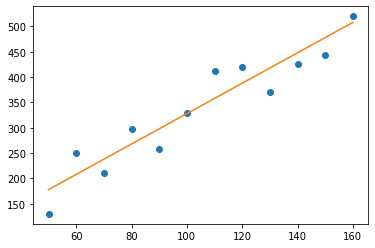

In [11]:
m= 3
# m is the slop of the line

b=28
# b is the intercept of the line

y=[m*x+b for x in size]
# the equation of the line 

plt.plot(size,price,"o")

plt.plot(size,y)

plt.show()